In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris(as_frame=True)
df = data.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [5]:
df[df['petal length (cm)']<=2.45].shape

(50, 5)

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_blobs

In [7]:
RANDOM_SEED = 139
train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1), (-3,-3), (4,2)],\
                                     n_features=2, random_state=RANDOM_SEED,\
                                     cluster_std=[1.2, 1.5, 1]
                                     )

In [8]:
pd.DataFrame(np.c_[train_data, train_labels])

,0,1,2
0,3.971351,1.558516,2.0
1,0.316834,1.108659,0.0
2,0.424717,-1.640907,1.0
3,-1.573161,1.248802,0.0
4,3.830120,0.901842,2.0
...,...,...,...
195,4.079036,1.216638,2.0
196,1.519920,1.098987,0.0
197,0.990209,0.279113,0.0
198,-1.178844,0.728361,0.0


In [9]:
#Lets's write an auxiliary function that will return grid for further visualization
def get_grid(data):
    x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min,y_max,0.1))

In [10]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,\
                                 random_state=RANDOM_SEED)
#training the tree
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=139)

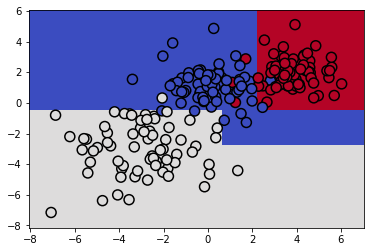

In [11]:
# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

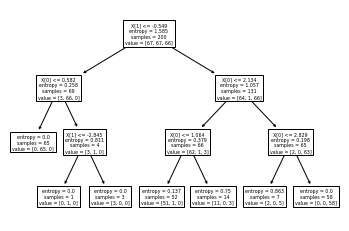

In [12]:
plot_tree(clf_tree);

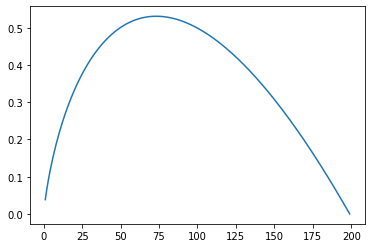

In [63]:
p = np.linspace(0,1, num=200)
entropy = -p*np.log2(p)
plt.plot(entropy)

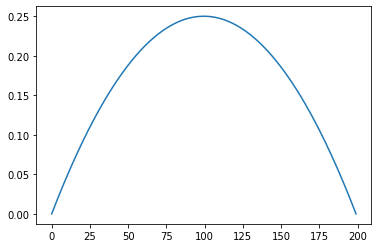

In [64]:
plt.plot(p*(1-p))

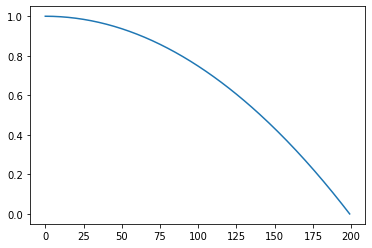

In [65]:
plt.plot(1-p**2)

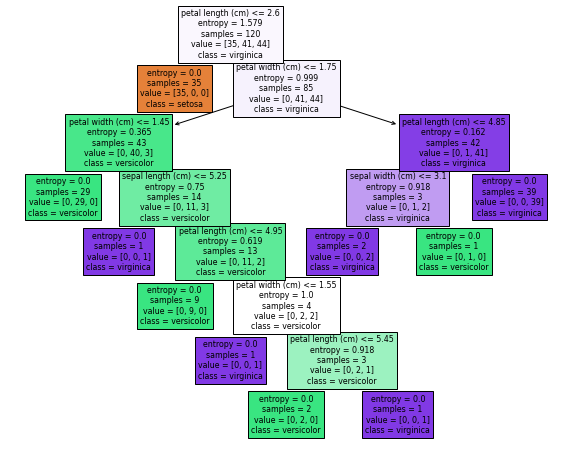

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

iris = load_iris()
plt.rcParams['figure.figsize'] = (10, 8)

#some more code
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Some feature values are present in train and absent in test and vice-versa.
#y = df_train['Should_Vacation_there']
#df_train, df_test = intersect_features(train=df_train, test=df_test)
#df_train

#training a decision tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=17)
dt.fit(X_train, y_train)

#displaying the tree
plot_tree(dt, feature_names=iris.feature_names, filled=True,
         class_names=iris.target_names);

In [14]:
data = pd.read_csv('bill_authentication.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [16]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [17]:
data.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
RANDOM_SEED = 17

X = np.array(data.drop('Class', axis=1))
y = np.array(data['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

clf = DecisionTreeClassifier(max_depth=3, max_features=2, random_state=RANDOM_SEED)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
round(f1_score(y_test, y_pred),3)

0.866

In [19]:
v = np.array([2.04378,-0.38422,1.437292,0.76421]).reshape(1, -1)
clf.predict(v)

array([0], dtype=int64)

Здесь приведена визуализация того, как одно решающее дерево разделяет выборку, состоящую из трёх классов.

Видно, что решающее дерево может очень неплохо отделить каждый класс от всех остальных. Разделяющая поверхность каждого класса кусочно-постоянная, и при этом каждая сторона поверхности параллельна оси координат, так как каждое условие сравнивает значение ровно одного признака с порогом.

В то же время решающее дерево вполне может переобучиться: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки. В этом случае, если записать в каждом листе ответ соответствующего объекта, на обучающей выборке получается нулевая ошибка. Дерево получается явно переобученным. Пример такого дерева:

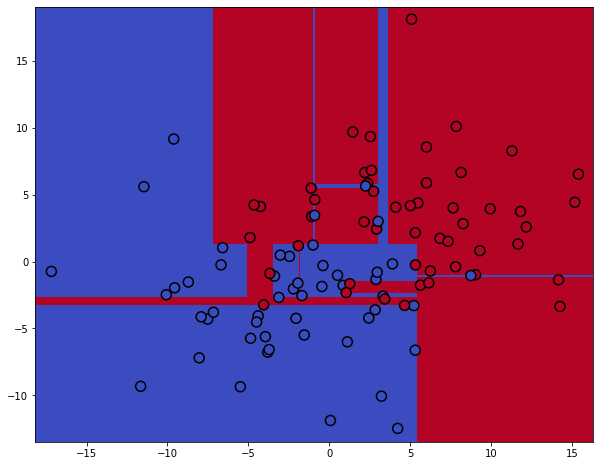

In [20]:
RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=100, centers=[(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(5,5))


clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

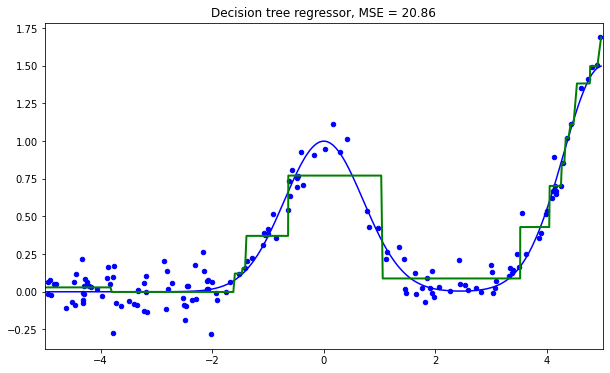

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [22]:
data = pd.read_csv('petrol_consumption.csv')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
RANDOM_SEED = 42

X = np.array(data.drop('Petrol_Consumption', axis=1))
y = np.array(data['Petrol_Consumption'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

clf = DecisionTreeRegressor(random_state=RANDOM_SEED)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred))**(1/2)
round(rmse,2)

87.97

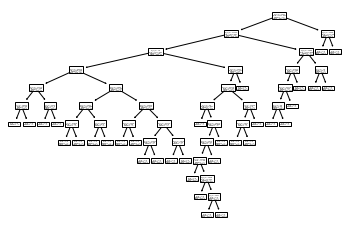

In [24]:
plot_tree(clf);

In [25]:
clf.tree_.max_depth

11

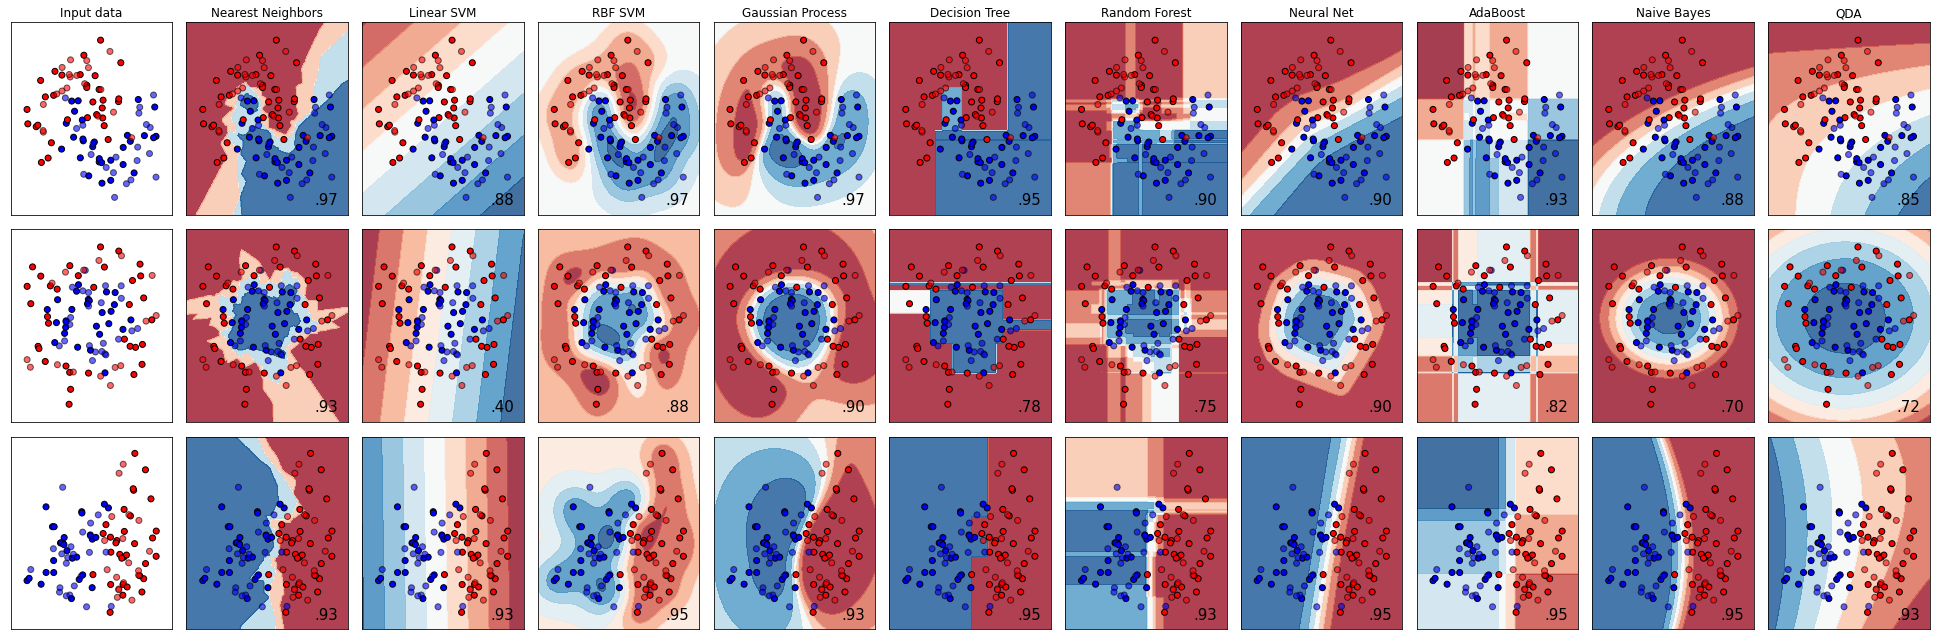

In [26]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9), facecolor='w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

### ЗАДАЧА О ВИНАХ
Реализуем бэггинг для деревьев решений. Для тренировки будем использовать датасет о винах.

Для начала подготовим данные к классификации. Условно разделим вино на хорошее и нет. Хорошим вином будем называть вино, параметр quality которого не менее 6.

Теперь сравним несколько методов классификации: логистическую регрессию, решающее дерево и бэггинг.

Разбейте выборку на обучающую и тренировочную с параметрами test_size=0.30, random_state=42.

Обучите два классификатора: логистическую регрессию (с дефолтными параметрами) и решающее дерево (random_state=42, максимальная глубина равна 10).

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score


data = pd.read_csv('winequality-red.csv',sep=';')
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


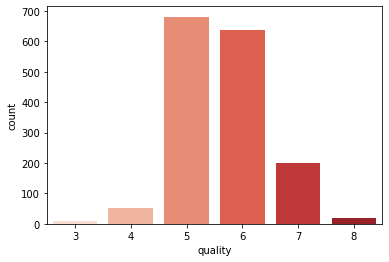

In [29]:
sns.countplot(data.quality, palette='Reds');

In [30]:
data['good_wine'] = data.quality.apply(lambda x: 0 if x<6 else 1)

In [31]:
data.good_wine.value_counts()

1    855
0    744
Name: good_wine, dtype: int64

In [32]:
X = np.array(data.drop(['quality', 'good_wine'], axis=1))
y = np.array(data['good_wine'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=10)

lr_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_valid)
y_pred_dt = dt_clf.predict(X_valid)

print(f'Logistic regression F1 score: {f1_score(y_valid, y_pred_lr):.3f}')
print(f'Decision tree F1 score: {f1_score(y_valid, y_pred_dt):.3f}')

Logistic regression F1 score: 0.754
Decision tree F1 score: 0.793


Обучите модель с использование бэггинга (функция BaggingClassifier с random_state=42, разделение выборки на обучающую и тренировочную с параметрами test_size=0.30, random_state=42) для алгоритма, показавшего лучшее качество, определите количество моделей 1500. Вычислите новое значение f1-score.

In [34]:
bg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42, max_depth=10),
                           n_estimators=1500,
                           random_state=42).fit(X_train, y_train)
print(f'Bagging F1 score: {f1_score(y_valid, bg_clf.predict(X_valid)):.3f}')

Bagging F1 score: 0.818


Теперь обучим случайный лес на простых данных и посмотрим, как можно подбирать параметры случайного леса для достижения наилучшего качества модели.  
Откроем его, удалим признаки, не относящиеся к предсказанию (от дня недели, например, или от года погода не зависит), разделим на тестовую и обучающуюся выборки:  

In [36]:
data = pd.read_csv('temps_extended.csv')
data.tail()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
2186,2016,12,28,Wed,15.21,0.05,0,42,44,45.3,47,30
2187,2016,12,29,Thurs,8.72,0.00,0,44,47,45.3,48,63
2188,2016,12,30,Fri,8.50,0.05,0,47,48,45.4,45,57
2189,2016,12,31,Sat,6.93,0.02,0,48,45,45.5,38,56
2190,2017,1,1,Sun,8.05,0.03,0,45,38,45.6,37,27


In [37]:
y = data['actual']
X = data.drop(['actual','weekday','month','day','year'], axis=1)
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.3, random_state=42)

In [45]:
# Попробуем подобрать гиперпараметры таким образом, чтобы получить оптимальный результат.
# Если мы запускаем случайный лес без настройки параметров, то по умолчанию они следующие:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

rf = RandomForestRegressor(random_state=42)
print('Параметры RandomForestRegressor по умолчанию:\n')
pprint(rf.get_params())

Параметры RandomForestRegressor по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [84]:
?RandomForestRegressor

Попробуем подбирать разные значения для некоторых параметров. Для перебора вариантов возьмем следующие параметры:

* n_estimators 
* max_features 
* max_depth 
* min_samples_split 
* min_samples_leaf
* bootstrap  

Мы можем сами указать, какие значения гиперпараметров надо перебрать.

Зададим сетку гиперпараметров, которые будут перебираться:

In [93]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse

rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1
                              )
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [108]:
params = rf_random.best_params_
params

{'n_estimators': 944,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [109]:
rf = RandomForestRegressor(random_state=42)
rf_best = RandomForestRegressor(n_estimators=944,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                max_features='sqrt',
                                max_depth=10,
                                bootstrap=True,
                                random_state=42)

rf.fit(X_train, y_train)
rf_best.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
y_pred_rf_best = rf_best.predict(X_val)

print(f'Default Random Forest mse: {mse(y_val, y_pred_rf):.3f}')
print(f'Best parameters Random Forest mse: {mse(y_val, y_pred_rf_best):.3f}')

Default Random Forest mse: 24.571
Best parameters Random Forest mse: 23.090


In [111]:
y_pred_rf_rand = rf_random.predict(X_val)

print(f'RandomSearchCV Random Forest mse: {mse(y_val, y_pred_rf_rand):.3f}')

RandomSearchCV Random Forest mse: 23.090
